/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


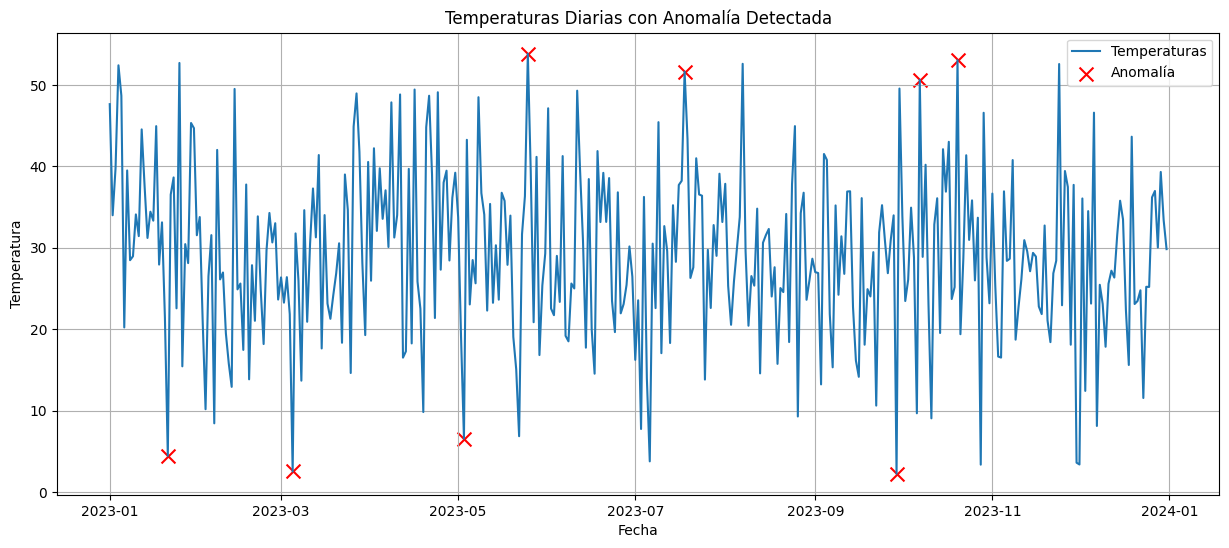

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generar datos
np.random.seed(0)
dias = pd.date_range(start='2023-01-01', periods=365, freq='D')
transacciones = np.random.normal(loc=30, scale=10, size=365) #

#Transacciones normales

# Introducir anomalías
indices_anomalos = np.random.choice(range(365), size=10, replace=False)
transacciones[indices_anomalos] *= .2
# Hacer las anomalías significativamente más grandes, puedes cambiar el factor para apreciar los cambios.

# Crear DataFrame
df_transacciones = pd.DataFrame({'Fecha': dias, 'Temperaturas':
transacciones})

# Utilizar Isolation Forest para detectar anomalías
iso_forest = IsolationForest(contamination=0.02)
# Suponemos que aproximadamente el 2% de los datos son anomalías
anomalies = iso_forest.fit_predict(df_transacciones[['Temperaturas']])
df_transacciones['Anomaly'] = anomalies == -1

# Gráfica de transacciones y anomalías
plt.figure(figsize=(15, 6))
plt.plot(df_transacciones['Fecha'], df_transacciones['Temperaturas'],
label='Temperaturas')
plt.scatter(df_transacciones.loc[df_transacciones['Anomaly'], 'Fecha'],
df_transacciones.loc[df_transacciones['Anomaly'],
'Temperaturas'],
color='red', label='Anomalía', marker='x', s=100)
# Marcar anomalías con una X roja
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.title('Temperaturas Diarias con Anomalía Detectada')
plt.legend()

plt.grid(True)
plt.show()

- ## ¿Existen lecturas de temperatura que se desvíen significativamente del rango esperado para esa área de la planta?
### si, hay alrededor 10 datos anormales.
- ## ¿Hay algún patrón o tendencia en las lecturas anómalas?
### pues no hay muchos pero uno de ellos es que las anomalias que aparecen normalmente se dan o al inicio o al final del año
- ## ¿Qué características tienen las lecturas anómalas en comparación con las lecturas normales?
### Esta mas que claro que las lecturas anomalas son radicalmente mas grandes que las normales su perando el promedio de estas.

#Informe
### En este trabajo de anomalias se pudo identificar facilmente estos mismos por lo cual las anomalias se generaron de manera random la verdad no encontre patrones en la generacion de estos datos de temperatura.
